<a href="https://colab.research.google.com/github/navneetkrc/Colab_fastai/blob/master/AV_Funny_jokes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Was that Joke Funny??

In [0]:
!pip install torch_nightly -f https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html
!pip install fastai

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *
from fastai.text import *

## Preparing the data

Many online businesses rely on customer reviews and ratings. Explicit feedback is especially important in the entertainment and ecommerce industry where all customer engagements are impacted by these ratings. Netflix relies on such rating data to power its recommendation engine to provide best movie and TV series recommendations that are personalized and most relevant to the user.

 

This practice problem challenges the participants to predict the ratings for jokes given by the users provided the ratings provided by the same users for another set of jokes. This dataset is taken from the famous jester online Joke Recommender system dataset.

 

We thank Dr. Ken Goldberg's group for putting this super cool data together and for permission to share it with the AV community. 

[Jester Funny Jokes](https://datahack.analyticsvidhya.com/contest/jester-practice-problem/)

In [0]:
!mkdir data
!mkdir data/train
!mkdir data/test

In [0]:
#upload the files
!unzip test.zip -d data/test
!mv sample_submission.csv data
!unzip train.zip -d data/train


Archive:  test.zip
  inflating: data/test/test.csv      
Archive:  train.zip
  inflating: data/train/jokes.csv    
  inflating: data/train/train.csv    


In [0]:
train = pd.read_csv('data/train/train.csv')
test = pd.read_csv('data/test/test.csv')
jokes = pd.read_csv('data/train/jokes.csv')

In [0]:
path = 'data/'
#!ls path

In [0]:
jokes.head()

,joke_id,joke_text
0,1,Q. What's O. J. Simpson's web address? A. Slas...
1,2,How many feminists does it take to screw in a ...
2,3,Q. Did you hear about the dyslexic devil worsh...
3,4,They asked the Japanese visitor if they have e...
4,5,Q: What did the blind person say when given so...


In [0]:
#train['joke_id'].value_counts()
train.head()

In [0]:
train_df = pd.merge(train,jokes,on='joke_id')
test_df = pd.merge(test,jokes[['joke_id', 'joke_text']],on='joke_id')
train_df.head()

,id,user_id,joke_id,Rating,joke_text
0,31030_110,31030,110,2.750,"Judy was having trouble with her computer, so ..."
1,9137_110,9137,110,1.719,"Judy was having trouble with her computer, so ..."
2,27649_110,27649,110,5.031,"Judy was having trouble with her computer, so ..."
3,35355_110,35355,110,3.031,"Judy was having trouble with her computer, so ..."
4,5478_110,5478,110,3.094,"Judy was having trouble with her computer, so ..."


In [0]:
test_df.head()

,id,user_id,joke_id,joke_text
0,6194_11,6194,11,What's the difference between a used tire and ...
1,13494_11,13494,11,What's the difference between a used tire and ...
2,35167_11,35167,11,What's the difference between a used tire and ...
3,25066_11,25066,11,What's the difference between a used tire and ...
4,25103_11,25103,11,What's the difference between a used tire and ...


In [0]:
#train_df['joke_id'].value_counts()
train_df.rename(index=str, columns={"joke_text": "text", "Rating": "target"},inplace=True)
test_df.rename(index=str, columns={"joke_text": "text"},inplace=True)

In [0]:
train_df.head()

,id,user_id,joke_id,target,text
0,31030_110,31030,110,2.750,"Judy was having trouble with her computer, so ..."
1,9137_110,9137,110,1.719,"Judy was having trouble with her computer, so ..."
2,27649_110,27649,110,5.031,"Judy was having trouble with her computer, so ..."
3,35355_110,35355,110,3.031,"Judy was having trouble with her computer, so ..."
4,5478_110,5478,110,3.094,"Judy was having trouble with her computer, so ..."


In [0]:
test_df.head()

,id,user_id,joke_id,text
0,6194_11,6194,11,What's the difference between a used tire and ...
1,13494_11,13494,11,What's the difference between a used tire and ...
2,35167_11,35167,11,What's the difference between a used tire and ...
3,25066_11,25066,11,What's the difference between a used tire and ...
4,25103_11,25103,11,What's the difference between a used tire and ...


In [0]:
train_df['text'][10000]

'One day the first grade teacher was reading the story of the Three Little Pigs to her class. She came to the part of the story where the first pig was trying to accumulate the building materials for his home. She read, "...and so the pig went up to the man with the wheelbarrow full of straw and said, \'Pardon me sir, but may I have some of that straw to build my house?\'" The teacher paused then asked the class, "And what do you think that man said?" One little boy raised his hand and said, "I know...he said, \'Holy Shit! A talking pig!\'"'

In [0]:
# create a dataframe
##df = pd.DataFrame({'label':train_df.Rating,
##                   'text':train_df.joke_text})
#this dataframe has a lot of duplicate questions need to remove that from the language model will check

In [0]:
##df.head()

??TextDataBunch.from_df()


Signature: TextDataBunch.from_df(path:Union[pathlib.Path, str], train_df:pandas.core.frame.DataFrame, valid_df:pandas.core.frame.DataFrame, test_df:Union[pandas.core.frame.DataFrame, NoneType]=None, tokenizer:fastai.text.transform.Tokenizer=None, vocab:fastai.text.transform.Vocab=None, classes:Collection[str]=None, text_cols:Union[int, Collection[int], str, Collection[str]]=1, label_cols:Union[int, Collection[int], str, Collection[str]]=0, label_delim:str=None, **kwargs) -> fastai.basic_data.DataBunch**

**Source:   
    @classmethod
    
    def from_df(cls, path:PathOrStr, train_df:DataFrame, valid_df:DataFrame, test_df:Optional[DataFrame]=None,
                tokenizer:Tokenizer=None, vocab:Vocab=None, classes:Collection[str]=None, text_cols:IntsOrStrs=1,
                label_cols:IntsOrStrs=0, label_delim:str=None, **kwargs) -> DataBunch:
        "Create a `TextDataBunch` from DataFrames."
        p_kwargs, kwargs = split_kwargs_by_func(kwargs, _get_processor)
        processor = _get_processor(tokenizer=tokenizer, vocab=vocab, **p_kwargs)
        if classes is None and is_listy(label_cols) and len(label_cols) > 1: classes = label_cols
        src = ItemLists(path, TextList.from_df(train_df, path, cols=text_cols, processor=processor),
                        TextList.from_df(valid_df, path, cols=text_cols, processor=processor))
        src = src.label_for_lm() if cls==TextLMDataBunch else src.label_from_df(cols=label_cols, classes=classes, sep=label_delim)
        if test_df is not None: src.add_test(TextList.from_df(test_df, path, cols=text_cols))
        return src.databunch(**kwargs)
File:      /usr/local/lib/python3.6/dist-packages/fastai/text/data.py
Type:      method
Run

In [0]:
#df.shape

In [0]:
from sklearn.model_selection import train_test_split

# split data into training and validation set
df_trn, df_val = train_test_split(train_df, stratify = train_df['target'], test_size = 0.2, random_state = 12)

In [0]:
df_trn.shape, df_val.shape

((873647, 5), (218412, 5))

In [0]:
##Save the transformed Train and Test sets to csv for creating and executing Language models
test_df.to_csv(f'test.csv', index=False)
train_df.to_csv(f'train.csv', index=False)
!mv test.csv data\
!mv train.csv data\

In [0]:
path_working = Path('data/')

In [0]:
# Language model data
data_lm = (TextList.from_csv(path_working, 'train.csv', cols='text') 
                   .random_split_by_pct()
                   .label_for_lm()
                   .add_test(TextList.from_csv(path_working, 'test.csv', cols='text'))
                   .databunch(bs=256))

In [49]:
learn = language_model_learner(data_lm, pretrained_model=URLs.WT103, drop_mult=0.7)
learn.model

SequentialRNN(
  (0): RNNCore(
    (encoder): Embedding(2159, 400, padding_idx=1)
    (encoder_dp): EmbeddingDropout(
      (emb): Embedding(2159, 400, padding_idx=1)
    )
    (rnns): ModuleList(
      (0): WeightDropout(
        (module): LSTM(400, 1150, batch_first=True)
      )
      (1): WeightDropout(
        (module): LSTM(1150, 1150, batch_first=True)
      )
      (2): WeightDropout(
        (module): LSTM(1150, 400, batch_first=True)
      )
    )
    (input_dp): RNNDropout()
    (hidden_dps): ModuleList(
      (0): RNNDropout()
      (1): RNNDropout()
      (2): RNNDropout()
    )
  )
  (1): LinearDecoder(
    (decoder): Linear(in_features=400, out_features=2159, bias=True)
    (output_dp): RNNDropout()
  )
)

In [0]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


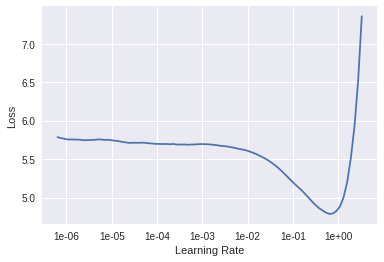

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(2, 1e-2)
learn.save('mini_train_lm')
learn.save_encoder('mini_train_encoder')

epoch,train_loss,valid_loss,accuracy


In [0]:
learn.show_results()

In [0]:
##load the encoder models in models folder and load the model encoder
#!mkdir data/models
#!mv mini_train_encoder.pth data/models/
#!mv mini_train_lm.pth data/models/
#learn.load_encoder('mini_train_encoder')

In [0]:
# Classifier model data

data_clas = (TextList.from_csv(path_working, 'train.csv',cols='text', vocab=data_lm.vocab, test='test')
    #.split_from_df(col='is_valid') #is_valid
    .label_from_df(cols='target')
    .add_test(TextList.from_csv(path_working, 'test.csv', cols='text'))
    .databunch(bs=42))

In [0]:
# Classifier model data
#data_clas = TextClasDataBunch.from_df(path = "", train_df = df_trn, valid_df = df_val, vocab=data_lm.train_ds.vocab, bs=32)

In [0]:
learn = language_model_learner(data_lm, pretrained_model=URLs.WT103, drop_mult=0.7)

In [0]:
# train the learner object
learn.fit_one_cycle(1, 1e-2)

It contains one line per review, with the Rating (numerical value), the text and a flag to determine if it should be part of the validation set or the training set. If we ignore this flag, we can create a DataBunch containing this data in one line of code:

In [0]:
#data_lm = TextDataBunch.from_csv(path='data/',csv_name='jokes.csv')
#data_lm = TextDataBunch.from_df(path, 'train_df', text_cols='joke_text',label_cols='Rating')
#data_lm = (TextList.from_folder(path='data/')
           #Inputs: all the text files in path
#            .filter_by_folder(include=['train', 'test']) 
           #We may have other temp folders that contain text files so we only keep what's in train and test
#            .random_split_by_pct(0.1)
           #We randomly split and keep 10% (10,000 reviews) for validation
#            .label_for_lm()           
           #We want to do a language model so we label accordingly
#            .databunch(bs=48))
data_lm.save('tmp_lm')



By executing this line a process was launched that took a bit of time. Let's dig a bit into it. Images could be fed (almost) directly into a model because they're just a big array of pixel values that are floats between 0 and 1. A text is composed of words, and we can't apply mathematical functions to them directly. We first have to convert them to numbers. This is done in two differents steps: tokenization and numericalization. A `TextDataBunch` does all of that behind the scenes for you.

Before we delve into the explanations, let's take the time to save the things that were calculated.

In [0]:
data_lm.save()

Next time we launch this notebook, we can skip the cell above that took a bit of time (and that will take a lot more when you get to the full dataset) and load those results like this:

In [0]:
data = TextDataBunch.load(path)

### Tokenization

The first step of processing we make texts go through is to split the raw sentences into words, or more exactly tokens. The easiest way to do this would be to split the string on spaces, but we can be smarter:

- we need to take care of punctuation
- some words are contractions of two different words, like isn't or don't
- we may need to clean some parts of our texts, if there's HTML code for instance

To see what the tokenizer had done behind the scenes, let's have a look at a few texts in a batch.

In [0]:
data = TextClasDataBunch.load(path)
data.show_batch()

The texts are truncated at 100 tokens for more readability. We can see that it did more than just split on space and punctuation symbols: 
- the "'s" are grouped together in one token
- the contractions are separated like his: "did", "n't"
- content has been cleaned for any HTML symbol and lower cased
- there are several special tokens (all those that begin by xx), to replace unkown tokens (see below) or to introduce different text fields (here we only have one).

### Numericalization

Once we have extracted tokens from our texts, we convert to integers by creating a list of all the words used. We only keep the ones that appear at list twice with a maximum vocabulary size of 60,000 (by default) and replace the ones that don't make the cut by the unknown token `UNK`.

The correspondance from ids tokens is stored in the `vocab` attribute of our datasets, in a dictionary called `itos` (for int to string).

In [0]:
data.vocab.itos[:10]

And if we look at what a what's in our datasets, we'll see the tokenized text as a representation:

In [0]:
data.train_ds[0][0]

But the underlying data is all numbers

In [0]:
data.train_ds[0][0].data[:10]

### With the data block API

We can use the data block API with NLP and have a lot more flexibility than what the default factory methods offer. In the previous example for instance, the data was randomly split between train and validation instead of reading the third column of the csv.

With the data block API though, we have to manually call the tokenize and numericalize steps. This allows more flexibility, and if you're not using the defaults from fastai, the variaous arguments to pass will appear in the step they're revelant, so it'll be more readable.

In [0]:
data = (TextList.from_csv(path, 'texts.csv', cols='text')
                .split_from_df(col=2)
                .label_from_df(cols=0)
                .databunch())

## Language model

Now let's grab the full dataset for what follows.

In [0]:
path = untar_data(URLs.IMDB)
path.ls()

In [0]:
(path/'train').ls()

The reviews are in a training and test set following an imagenet structure. The only difference is that there is an `unsup` folder in `train` that contains the unlabelled data.

We're not going to train a model that classifies the reviews from scratch. Like in computer vision, we'll use a model pretrained on a bigger dataset (a cleaned subset of wikipeia called [wikitext-103](https://einstein.ai/research/blog/the-wikitext-long-term-dependency-language-modeling-dataset)). That model has been trained to guess what the next word, its input being all the previous words. It has a recurrent structure and a hidden state that is updated each time it sees a new word. This hidden state thus contains information about the sentence up to that point.

We are going to use that 'knowledge' of the English language to build our classifier, but first, like for computer vision, we need to fine-tune the pretrained model to our particular dataset. Because the English of the reviex lefts by people on IMDB isn't the same as the English of wikipedia, we'll need to adjust a little bit the parameters of our model. Plus there might be some words extremely common in that dataset that were barely present in wikipedia, and therefore might no be part of the vocabulary the model was trained on.

Note that language models can use a lot of GPU, so you may need to decrease batchsize here.

This is where the unlabelled data is going to be useful to us, as we can use it to fine-tune our model. Let's create our data object with the data block API (next line takes a few minutes).

In [0]:
bs=32

In [0]:
data_lm = (TextList.from_folder(path)
           #Inputs: all the text files in path
            .filter_by_folder(include=['train', 'test']) 
           #We may have other temp folders that contain text files so we only keep what's in train and test
            .random_split_by_pct(0.1)
           #We randomly split and keep 10% (10,000 reviews) for validation
            .label_for_lm()           
           #We want to do a language model so we label accordingly
            .databunch(bs=bs))
data_lm.save('tmp_lm')

We have to use a special kind of `TextDataBunch` for the language model, that ignores the labels (that's why we put 0 everywhere), will shuffle the texts at each epoch before concatenating them all together (only for training, we don't shuffle for the validation set) and will send batches that read that text in order with targets that are the next word in the sentence.

The line before being a bit long, we want to load quickly the final ids by using the following cell.

In [0]:
data_lm = TextLMDataBunch.load(path, 'tmp_lm', bs=bs)

In [0]:
data_lm.show_batch()

idx,text
0,"xxbos xxmaj oh god , what a horrible , horrible film . xxmaj meant to be a comment on the state of society , it 's just a reflection of the worst of the worst in reality xxup tv . xxmaj interstitials hosted by xxmaj jason xxmaj jones and xxmaj don mckellar are the most obnoxious part , written in a tone that is perhaps meant to be reflexive and"
1,bad . \n\n xxmaj low budget wise i think the special effects was more computer generated in nature . xxmaj lots of computer generated ghostly images and billowing smoke kind of stuff . xxmaj rossiter had some special effects work and there was some scenes where gory effects were used . i would give them a pat on the back for the effort . xxmaj it was better than some
2,"traits onto them . xxmaj fans do this , turning ridiculously bad characters into iconic figures of their own dreams of power and adventure . xxmaj on top of that , fans have mistaken their background stories for actual personality depth . \n\n xxmaj marketing : xxup ffvii 's release marked the first time a video game had been so widely advertised . xxup tv ads showed consumers the high"
3,"would not find , not even on the pages of my xxmaj brighton anarchist friends ' ' xxmaj the xxmaj xxunk ' ( ah , ah ! ) . xxmaj and this is also a very intelligent , humane and absorbing thriller ( for want of a better word , we all express ourselves by clichés , like xxmaj peter or xxmaj jan would say ! ) because xxmaj hans"
4,"first round . xxmaj between xxmaj let the xxmaj right xxmaj one xxmaj in or xxmaj near xxmaj dark , it 's tougher to call . 9.5 / 10 xxbos xxmaj this movie is all wrapped up in about the first hour and half . a dog that talks karate chops a gang that has killed his master . xxmaj after that , he goes around and makes terrible jokes"


We can then put this in a learner object very easily with a model loaded with the pretrained weights. They'll be downloaded the first time you'll execute the following line and stored in './fastai/models/' (or elsewhere if you specified different paths in your config file).

In [0]:
learn = language_model_learner(data_lm, pretrained_model=URLs.WT103_1, drop_mult=0.3)

In [0]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


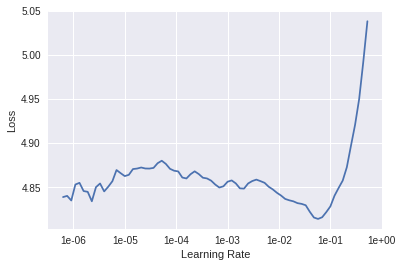

In [0]:
learn.recorder.plot(skip_end=15)

In [0]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy


Total time: 1:24:10

epoch	train_loss	valid_loss	accuracy

1	4.198589	4.057909	0.294069


In [0]:
learn.save('fit_head')

In [0]:
learn.load('fit_head');

To complete the fine-tuning, we can then unfeeze and launch a new training.

In [0]:
learn.unfreeze()
learn.fit_one_cycle(20, 1e-3, moms=(0.8,0.7))

In [0]:
learn.save('fine_tuned')

How good is our model? Well let's try to see what it predicts after a few given words.

In [0]:
learn.load('fine_tuned');

In [0]:
TEXT = "i liked this movie because"
N_WORDS = 40
N_SENTENCES = 2

In [0]:
print("\n".join(learn.predict(TEXT, N_WORDS) for _ in range(N_SENTENCES)))

We have to save the model but also it's encoder, the part that's responsible for creating and updating the hidden state. For the next part, we don't care about the part that tries to guess the next word.

In [0]:
learn.save_encoder('fine_tuned_enc')

## Classifier

Now, we'll create a new data object that only grabs the labelled data and keeps those labels. Again, this line takes a bit of time.

In [0]:
path = untar_data(URLs.IMDB)

In [0]:
data_clas = (TextList.from_folder(path, vocab=data_lm.vocab)
             #grab all the text files in path
             .split_by_folder(valid='test')
             #split by train and valid folder (that only keeps 'train' and 'test' so no need to filter)
             .label_from_folder(classes=['neg', 'pos'])
             #remove docs with labels not in above list (i.e. 'unsup')
             .filter_missing_y()
             #label them all with their folders
             .databunch(bs=bs))
data_clas.save('tmp_clas')

In [0]:
len(data_clas.train_ds)

In [0]:
data_clas = TextClasDataBunch.load(path, 'tmp_clas', bs=bs)
data_clas.show_batch()

We can then create a model to classify those reviews and load the encoder we saved before.

In [0]:
learn = text_classifier_learner(data_clas, drop_mult=0.5)
learn.load_encoder('fine_tuned_enc')
learn.freeze()

In [0]:
learn.lr_find()

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(1, 2e-2, moms=(0.8,0.7))

In [0]:
learn.save('first')

In [0]:
learn.load('first');

In [0]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

In [0]:
learn.save('second')

In [0]:
learn.load('second');

In [0]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

In [0]:
learn.save('third')

In [0]:
learn.load('third');

In [0]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

In [0]:
learn.predict("I really loved that movie, it was awesome!")